In [1]:
#importing necessary open source libraries 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Part 1

In [2]:
# load dataset into Pandas DataFrame and display it
df = pd.read_csv('unlabeled.csv')
df

,Unnamed: 0,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,...,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,filename
0,0,0.975,0.087026,0.457144,-0.885125,-0.243375,0.297407,-0.923211,-0.086,0.395,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Training_1214649.csv
1,1,0.975,0.160786,0.006717,-0.986966,-0.157439,0.030056,-0.987071,0.002,0.019,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,Training_582538.csv
2,2,0.875,0.156973,0.017771,-0.987443,-0.156319,-0.067934,-0.985368,0.000,-0.025,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Training_1269926.csv
3,3,0.875,0.189222,0.271163,-0.943751,-0.139319,0.166241,-0.976194,0.026,0.224,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,Training_1433924.csv
4,4,0.975,0.187490,0.110555,-0.976025,-0.160147,0.056067,-0.985500,0.014,0.085,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,Training_1151951.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,0.875,0.177515,0.058916,-0.982353,-0.127523,0.081609,-0.988472,0.025,0.071,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,Training_991508.csv
196,196,0.875,0.164606,0.145677,-0.975542,-0.153036,0.157292,-0.975622,0.006,0.154,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,Training_736311.csv
197,197,0.875,0.178337,0.055344,-0.982412,-0.136643,0.058983,-0.988863,0.021,0.058,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,Training_374584.csv
198,198,0.975,0.071168,0.126356,-0.989429,-0.265349,0.147200,-0.952849,-0.100,0.140,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,Training_2827611.csv


In [3]:
# Separating out the features
features = ['gaze_0_x','gaze_0_y','gaze_0_z','gaze_1_x','gaze_1_y','gaze_1_z']
x = df.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# Apllying PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])

finalDf = principalDf

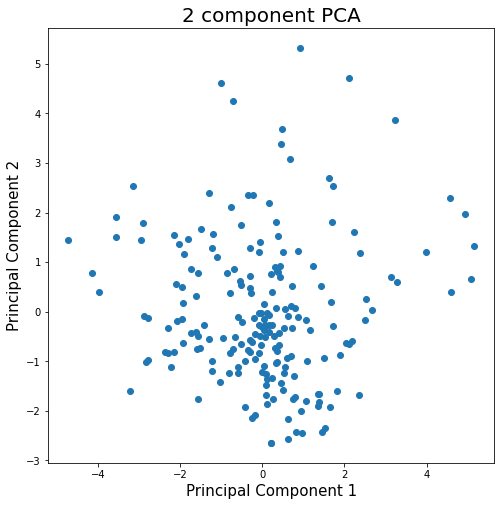

In [4]:
#Plotting the scatter plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
plt.scatter(finalDf['principal_component_1'], finalDf['principal_component_2'])
plt.show()

ax.grid()

In [5]:
# Explained Variance
pca.explained_variance_ratio_

array([0.4556903, 0.358429 ])

### Discussion for Part 1
We applied standartization and PCA to reduce dimensionality of data. 
6 features were chosen for this purposes (gaze_0_x','gaze_0_y','gaze_0_z','gaze_1_x','gaze_1_y','gaze_1_z') and then divided into 2 new features('principal_component_1','principal_component_2').

Moreover, the results were plotted using the scatter as you see above. 
Then, to see how much information (variance) can be attributed to each of the principal components, the explained_variance_ratio_ was apllied to our result. This tells us that the principal_component_1 contains 45.6%, and the principal_component_2 contains 35.8% of the variance. Together, the two components contain 80.4% of the information.

## Part 2

In [6]:
# reading the CSV file into pandas dataframe
mydata = pd.read_csv('unlabeled.csv')
mydata

,Unnamed: 0,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,...,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,filename
0,0,0.975,0.087026,0.457144,-0.885125,-0.243375,0.297407,-0.923211,-0.086,0.395,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Training_1214649.csv
1,1,0.975,0.160786,0.006717,-0.986966,-0.157439,0.030056,-0.987071,0.002,0.019,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,Training_582538.csv
2,2,0.875,0.156973,0.017771,-0.987443,-0.156319,-0.067934,-0.985368,0.000,-0.025,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Training_1269926.csv
3,3,0.875,0.189222,0.271163,-0.943751,-0.139319,0.166241,-0.976194,0.026,0.224,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,Training_1433924.csv
4,4,0.975,0.187490,0.110555,-0.976025,-0.160147,0.056067,-0.985500,0.014,0.085,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,Training_1151951.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,0.875,0.177515,0.058916,-0.982353,-0.127523,0.081609,-0.988472,0.025,0.071,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,Training_991508.csv
196,196,0.875,0.164606,0.145677,-0.975542,-0.153036,0.157292,-0.975622,0.006,0.154,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,Training_736311.csv
197,197,0.875,0.178337,0.055344,-0.982412,-0.136643,0.058983,-0.988863,0.021,0.058,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,Training_374584.csv
198,198,0.975,0.071168,0.126356,-0.989429,-0.265349,0.147200,-0.952849,-0.100,0.140,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,Training_2827611.csv


In [8]:
# List to store cluster and intra cluster distance
clusters = []
inertia_vals = []

for k in range(1, 10, 1):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=7, n_jobs=10)
    model.fit(finalDf)
# append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

/Users/karlykussainova/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/karlykussainova/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/karlykussainova/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/karlykussainova/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0

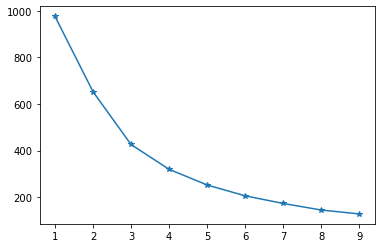

In [9]:
# plot the inertia vs K values
plt.plot(range(1,10,1),inertia_vals,marker='*')
plt.show()

In [10]:
from sklearn.metrics import silhouette_score
for i in range(1,9,1):
    
    print("---------------------------------------")
    print(clusters[i])
    print("Silhouette score:",silhouette_score(finalDf, clusters[i].predict(finalDf)))

---------------------------------------
KMeans(n_clusters=2, n_jobs=10, random_state=7)
Silhouette score: 0.34829815524095364
---------------------------------------
KMeans(n_clusters=3, n_jobs=10, random_state=7)
Silhouette score: 0.38881321538784536
---------------------------------------
KMeans(n_clusters=4, n_jobs=10, random_state=7)
Silhouette score: 0.41409628190989906
---------------------------------------
KMeans(n_clusters=5, n_jobs=10, random_state=7)
Silhouette score: 0.3609875741888875
---------------------------------------
KMeans(n_clusters=6, n_jobs=10, random_state=7)
Silhouette score: 0.3852582633874438
---------------------------------------
KMeans(n_clusters=7, n_jobs=10, random_state=7)
Silhouette score: 0.3688314388285694
---------------------------------------
KMeans(n_jobs=10, random_state=7)
Silhouette score: 0.38693513303557764
---------------------------------------
KMeans(n_clusters=9, n_jobs=10, random_state=7)
Silhouette score: 0.3894476080995128


### Discussion for Part 2

#### What is the optimal silhouette score that you find, with which value of K? What does this signify?

The optimal silhouette score is 0.41cwith the k equal to 4. 

The Silhouette score is used to measure the degree of separation between clusters; therefore, we chose the highest score for this. In other words, the degree of the class separation is at its highest when number of clusters is 4. 

## Part 3

In [11]:
#Initialize the class object
kmeans = KMeans(n_clusters= 4)
 
#predict the labels of clusters.
label = kmeans.fit_predict(finalDf)
 
print(label)

[1 2 2 1 2 1 1 2 1 0 0 0 1 3 2 2 1 2 0 2 2 2 1 1 1 2 2 2 1 1 2 2 0 1 3 2 2
 1 0 2 1 1 0 1 2 2 1 1 2 1 2 2 0 1 1 2 3 1 2 2 0 1 2 3 2 1 1 0 1 2 3 1 2 2
 3 0 2 1 2 1 1 2 1 0 0 2 2 1 0 2 2 2 2 1 1 2 2 2 2 0 2 2 0 2 2 2 2 0 2 0 2
 0 3 2 0 1 2 3 2 2 0 1 2 2 0 2 0 2 1 3 3 2 0 2 2 2 3 2 2 1 0 2 2 1 0 2 2 0
 2 1 2 2 2 2 2 0 2 2 2 2 2 0 2 0 2 3 2 1 2 2 3 2 1 2 2 2 0 2 2 0 2 2 0 2 0
 2 3 2 2 0 0 2 2 0 0 2 1 2 0 2]


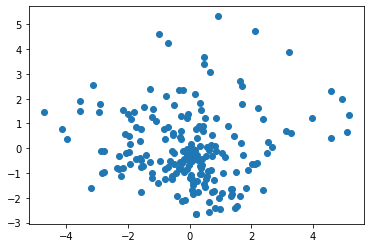

In [24]:
#plotting the original graph
plt.scatter(finalDf['principal_component_1'] , finalDf['principal_component_2'] )
plt.show()

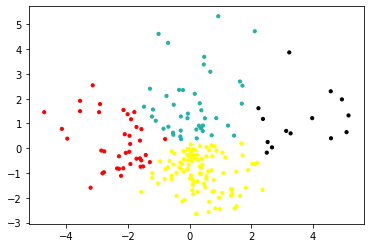

In [25]:
# plotting the graph by classes in 4 colors
colormap = np.array(['red', 'lightseagreen', 'yellow', 'black'])

xs = finalDf['principal_component_1'].to_numpy() # principal_component_1 as x values
ys = finalDf['principal_component_2'].to_numpy() # principal_component_2 as y values

plt.scatter(xs , ys, s=10, c=colormap[label]) 
plt.show()

### Discussion for Part 3

#### What labels can you propose for the clusters?


From what I see from the graph and looking at the pictures in the file folder, I would label each class in the following way: 

0 --> faces that are happy with interacting with a software {geniunly smile and look positive}

1 --> happy faces that are very excited about the interaction {smile showing their teeth}

2 --> faces that are either unhappy or neutral  {the smile is not notable at all or the lip lines are straight, the eyes wide open}

3 --> all types of facial expressions, but taken aside


## Draft 

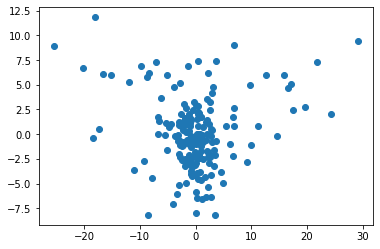

In [57]:
plt.scatter(finalDf['principal_component_1'], finalDf['principal_component_2'])
plt.show()

In [111]:
lst = list(range(1, 57)) #AU04_c
for i in range(0,56):
    lst[i] = ('AU' + str(i) + '_c')
lst

['AU0_c',
 'AU1_c',
 'AU2_c',
 'AU3_c',
 'AU4_c',
 'AU5_c',
 'AU6_c',
 'AU7_c',
 'AU8_c',
 'AU9_c',
 'AU10_c',
 'AU11_c',
 'AU12_c',
 'AU13_c',
 'AU14_c',
 'AU15_c',
 'AU16_c',
 'AU17_c',
 'AU18_c',
 'AU19_c',
 'AU20_c',
 'AU21_c',
 'AU22_c',
 'AU23_c',
 'AU24_c',
 'AU25_c',
 'AU26_c',
 'AU27_c',
 'AU28_c',
 'AU29_c',
 'AU30_c',
 'AU31_c',
 'AU32_c',
 'AU33_c',
 'AU34_c',
 'AU35_c',
 'AU36_c',
 'AU37_c',
 'AU38_c',
 'AU39_c',
 'AU40_c',
 'AU41_c',
 'AU42_c',
 'AU43_c',
 'AU44_c',
 'AU45_c',
 'AU46_c',
 'AU47_c',
 'AU48_c',
 'AU49_c',
 'AU50_c',
 'AU51_c',
 'AU52_c',
 'AU53_c',
 'AU54_c',
 'AU55_c']

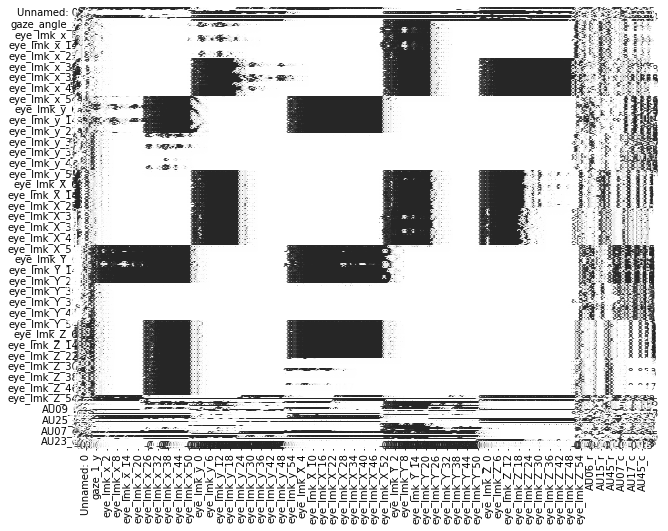

In [7]:
# correlation matrix to visualize those that correlate more
plt.figure(figsize=(10,8))
sns.heatmap(mydata.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [116]:
# features = [confidence',
#             'gaze_0_x','gaze_0_y','gaze_0_z',
#             'gaze_1_x','gaze_1_y','gaze_1_z',
#             'gaze_angle_x','gaze_angle_y', 
#             'eye_lmk_x_0',
#  'eye_lmk_x_1',
#  'eye_lmk_x_2',
#  'eye_lmk_x_3',
#  'eye_lmk_x_4',
#  'eye_lmk_x_5',
#  'eye_lmk_x_6',
#  'eye_lmk_x_7',
#  'eye_lmk_x_8',
#  'eye_lmk_x_9',
#  'eye_lmk_x_10',
#  'eye_lmk_x_11',
#  'eye_lmk_x_12',
#  'eye_lmk_x_13',
#  'eye_lmk_x_14',
#  'eye_lmk_x_15',
#  'eye_lmk_x_16',
#  'eye_lmk_x_17',
#  'eye_lmk_x_18',
#  'eye_lmk_x_19',
#  'eye_lmk_x_20',
#  'eye_lmk_x_21',
#  'eye_lmk_x_22',
#  'eye_lmk_x_23',
#  'eye_lmk_x_24',
#  'eye_lmk_x_25',
#  'eye_lmk_x_26',
#  'eye_lmk_x_27',
#  'eye_lmk_x_28',
#  'eye_lmk_x_29',
#  'eye_lmk_x_30',
#  'eye_lmk_x_31',
#  'eye_lmk_x_32',
#  'eye_lmk_x_33',
#  'eye_lmk_x_34',
#  'eye_lmk_x_35',
#  'eye_lmk_x_36',
#  'eye_lmk_x_37',
#  'eye_lmk_x_38',
#  'eye_lmk_x_39',
#  'eye_lmk_x_40',
#  'eye_lmk_x_41',
#  'eye_lmk_x_42',
#  'eye_lmk_x_43',
#  'eye_lmk_x_44',
#  'eye_lmk_x_45',
#  'eye_lmk_x_46',
#  'eye_lmk_x_47',
#  'eye_lmk_x_48',
#  'eye_lmk_x_49',
#  'eye_lmk_x_50',
#  'eye_lmk_x_51',
#  'eye_lmk_x_52',
#  'eye_lmk_x_53',
#  'eye_lmk_x_54',
#  'eye_lmk_x_55','eye_lmk_X_0',
#  'eye_lmk_X_1',
#  'eye_lmk_X_2',
#  'eye_lmk_X_3',
#  'eye_lmk_X_4',
#  'eye_lmk_X_5',
#  'eye_lmk_X_6',
#  'eye_lmk_X_7',
#  'eye_lmk_X_8',
#  'eye_lmk_X_9',
#  'eye_lmk_X_10',
#  'eye_lmk_X_11',
#  'eye_lmk_X_12',
#  'eye_lmk_X_13',
#  'eye_lmk_X_14',
#  'eye_lmk_X_15',
#  'eye_lmk_X_16',
#  'eye_lmk_X_17',
#  'eye_lmk_X_18',
#  'eye_lmk_X_19',
#  'eye_lmk_X_20',
#  'eye_lmk_X_21',
#  'eye_lmk_X_22',
#  'eye_lmk_X_23',
#  'eye_lmk_X_24',
#  'eye_lmk_X_25',
#  'eye_lmk_X_26',
#  'eye_lmk_X_27',
#  'eye_lmk_X_28',
#  'eye_lmk_X_29',
#  'eye_lmk_X_30',
#  'eye_lmk_X_31',
#  'eye_lmk_X_32',
#  'eye_lmk_X_33',
#  'eye_lmk_X_34',
#  'eye_lmk_X_35',
#  'eye_lmk_X_36',
#  'eye_lmk_X_37',
#  'eye_lmk_X_38',
#  'eye_lmk_X_39',
#  'eye_lmk_X_40',
#  'eye_lmk_X_41',
#  'eye_lmk_X_42',
#  'eye_lmk_X_43',
#  'eye_lmk_X_44',
#  'eye_lmk_X_45',
#  'eye_lmk_X_46',
#  'eye_lmk_X_47',
#  'eye_lmk_X_48',
#  'eye_lmk_X_49',
#  'eye_lmk_X_50',
#  'eye_lmk_X_51',
#  'eye_lmk_X_52',
#  'eye_lmk_X_53',
#  'eye_lmk_X_54',
#  'eye_lmk_X_55',
#            'eye_lmk_y_0',
#  'eye_lmk_y_1',
#  'eye_lmk_y_2',
#  'eye_lmk_y_3',
#  'eye_lmk_y_4',
#  'eye_lmk_y_5',
#  'eye_lmk_y_6',
#  'eye_lmk_y_7',
#  'eye_lmk_y_8',
#  'eye_lmk_y_9',
#  'eye_lmk_y_10',
#  'eye_lmk_y_11',
#  'eye_lmk_y_12',
#  'eye_lmk_y_13',
#  'eye_lmk_y_14',
#  'eye_lmk_y_15',
#  'eye_lmk_y_16',
#  'eye_lmk_y_17',
#  'eye_lmk_y_18',
#  'eye_lmk_y_19',
#  'eye_lmk_y_20',
#  'eye_lmk_y_21',
#  'eye_lmk_y_22',
#  'eye_lmk_y_23',
#  'eye_lmk_y_24',
#  'eye_lmk_y_25',
#  'eye_lmk_y_26',
#  'eye_lmk_y_27',
#  'eye_lmk_y_28',
#  'eye_lmk_y_29',
#  'eye_lmk_y_30',
#  'eye_lmk_y_31',
#  'eye_lmk_y_32',
#  'eye_lmk_y_33',
#  'eye_lmk_y_34',
#  'eye_lmk_y_35',
#  'eye_lmk_y_36',
#  'eye_lmk_y_37',
#  'eye_lmk_y_38',
#  'eye_lmk_y_39',
#  'eye_lmk_y_40',
#  'eye_lmk_y_41',
#  'eye_lmk_y_42',
#  'eye_lmk_y_43',
#  'eye_lmk_y_44',
#  'eye_lmk_y_45',
#  'eye_lmk_y_46',
#  'eye_lmk_y_47',
#  'eye_lmk_y_48',
#  'eye_lmk_y_49',
#  'eye_lmk_y_50',
#  'eye_lmk_y_51',
#  'eye_lmk_y_52',
#  'eye_lmk_y_53',
#  'eye_lmk_y_54',
#  'eye_lmk_y_55',
#            'eye_lmk_Y_0',
#  'eye_lmk_Y_1',
#  'eye_lmk_Y_2',
#  'eye_lmk_Y_3',
#  'eye_lmk_Y_4',
#  'eye_lmk_Y_5',
#  'eye_lmk_Y_6',
#  'eye_lmk_Y_7',
#  'eye_lmk_Y_8',
#  'eye_lmk_Y_9',
#  'eye_lmk_Y_10',
#  'eye_lmk_Y_11',
#  'eye_lmk_Y_12',
#  'eye_lmk_Y_13',
#  'eye_lmk_Y_14',
#  'eye_lmk_Y_15',
#  'eye_lmk_Y_16',
#  'eye_lmk_Y_17',
#  'eye_lmk_Y_18',
#  'eye_lmk_Y_19',
#  'eye_lmk_Y_20',
#  'eye_lmk_Y_21',
#  'eye_lmk_Y_22',
#  'eye_lmk_Y_23',
#  'eye_lmk_Y_24',
#  'eye_lmk_Y_25',
#  'eye_lmk_Y_26',
#  'eye_lmk_Y_27',
#  'eye_lmk_Y_28',
#  'eye_lmk_Y_29',
#  'eye_lmk_Y_30',
#  'eye_lmk_Y_31',
#  'eye_lmk_Y_32',
#  'eye_lmk_Y_33',
#  'eye_lmk_Y_34',
#  'eye_lmk_Y_35',
#  'eye_lmk_Y_36',
#  'eye_lmk_Y_37',
#  'eye_lmk_Y_38',
#  'eye_lmk_Y_39',
#  'eye_lmk_Y_40',
#  'eye_lmk_Y_41',
#  'eye_lmk_Y_42',
#  'eye_lmk_Y_43',
#  'eye_lmk_Y_44',
#  'eye_lmk_Y_45',
#  'eye_lmk_Y_46',
#  'eye_lmk_Y_47',
#  'eye_lmk_Y_48',
#  'eye_lmk_Y_49',
#  'eye_lmk_Y_50',
#  'eye_lmk_Y_51',
#  'eye_lmk_Y_52',
#  'eye_lmk_Y_53',
#  'eye_lmk_Y_54',
#  'eye_lmk_Y_55']
